In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf 

# Import Neural Net & Data Libraries

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import keras.utils
import keras.metrics



In [2]:
# Load Data

data = keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='int')
scaled_data = data.map(lambda x,y: (x/255, y))


Found 440 files belonging to 2 classes.


In [3]:
# Assign Data

test_len = int(0.1 * len(scaled_data))
train_len = int(0.6 * len(scaled_data))
val_len = int(0.3 * len(scaled_data))

test = scaled_data.take(test_len)
train = scaled_data.skip(test_len).take(train_len)
valid = scaled_data.skip(train_len + test_len).take(val_len)

In [4]:
# Model Creation

model = Sequential([

Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)),
MaxPooling2D((2,2)), 
Dropout(0.25),

 
Conv2D(128, (3,3), activation='relu'),
MaxPooling2D(2,2),
Dropout(0.25),


Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(2,2),
Dropout(0.25),


Flatten(),

Dense(64, activation='relu'),
Dropout(0.3),


Dense(1, activation='sigmoid')







    
])

In [5]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 128)       0

In [7]:
log_directory = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/20


8/8 [==============================] - 62s 7s/step - loss: 1.2119 - accuracy: 0.4766 - val_loss: 0.6884 - val_accuracy: 0.4766
Epoch 2/20
8/8 [==============================] - 58s 7s/step - loss: 0.6517 - accuracy: 0.5781 - val_loss: 0.6804 - val_accuracy: 0.5625
Epoch 3/20
8/8 [==============================] - 58s 7s/step - loss: 0.6511 - accuracy: 0.6250 - val_loss: 0.6452 - val_accuracy: 0.5625
Epoch 4/20
8/8 [==============================] - 54s 6s/step - loss: 0.5396 - accuracy: 0.7695 - val_loss: 0.4338 - val_accuracy: 0.8672
Epoch 5/20
8/8 [==============================] - 53s 6s/step - loss: 0.3979 - accuracy: 0.8438 - val_loss: 0.3033 - val_accuracy: 0.8906
Epoch 6/20
8/8 [==============================] - 53s 6s/step - loss: 0.3739 - accuracy: 0.8594 - val_loss: 0.3525 - val_accuracy: 0.8750
Epoch 7/20
8/8 [==============================] - 54s 7s/step - loss: 0.2953 - accuracy: 0.9062 - val_loss: 0.3010 - val_accuracy: 0.9297
Epoch 8/20
8/8 [================

In [8]:
recall = keras.metrics.Recall()
accuracy = keras.metrics.BinaryAccuracy()
precision = keras.metrics.Precision()

for batch in test.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)

    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)
    precision.update_state(y, yhat)


1/1 [==============================] - 1s 1s/step


In [9]:
print(f"Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}, Precision:{precision.result().numpy()}")

Recall:0.7333333492279053, Accuracy:0.875, Precision:1.0


In [10]:
import os

In [11]:
first_model = load_model(os.path.join('models','model.h5'))

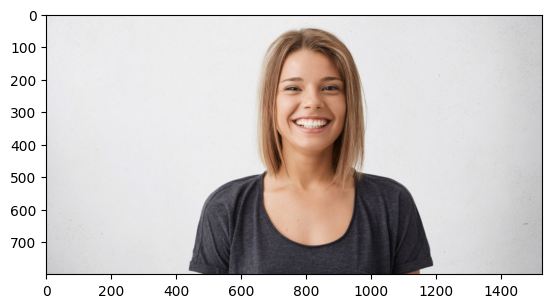

In [31]:
image = cv2.imread('niceperson.jpg')
resize = tf.image.resize(image, (256,256))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims((resize/255), 0))

1/1 [==============================] - 0s 98ms/step


In [33]:
if yhat >= 0.5:
    print("This person is wearing a mask")
elif yhat < 0.5:
    print("This person is not wearing a mask")

This person is not wearing a mask


In [34]:
yhat

array([[9.1463124e-05]], dtype=float32)